In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)

In [2]:
DATA_PATH = r"C:\Documents\Portfolio\supply_chain_project\Data\supply_chain_clean.csv"
df = pd.read_csv(DATA_PATH)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   retail_order_id      9994 non-null   int64  
 1   order_id             9994 non-null   object 
 2   order_date           9994 non-null   object 
 3   ship_date            9994 non-null   object 
 4   ship_mode            9994 non-null   object 
 5   customer_id          9994 non-null   object 
 6   customer_name        9994 non-null   object 
 7   segment              9994 non-null   object 
 8   postal_code          9994 non-null   int64  
 9   country              9994 non-null   object 
 10  city                 9994 non-null   object 
 11  state                9994 non-null   object 
 12  region               9994 non-null   object 
 13  latitude             9994 non-null   float64
 14  longitude            9994 non-null   float64
 15  retail_sales_people  9994 non-null   o

In [4]:
df.head()

,retail_order_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,country,city,state,region,latitude,longitude,retail_sales_people,product_id,product_name,sub_category,category,returned,sales,quantity,discount,profit,cost,unit_cp,unit_sp,days,return_flag,sla_days,on_time,margin,margin_rate,sales_outlier,quantity_outlier,margin_rate_outlier,days_outlier,suspect_days,suspect_prices,profit_mismatch,sales_mismatch,cost_mismatch
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,Henderson,Kentucky,South,37.839333,-84.270018,Cassandra Brandow,FUR-BO-10001798,Bush Somerset Collection Bookcase,Bookcases,Furniture,No,261.9600,2.0,0.00,41.9136,220.0464,110.0232,130.9800,92,0,7.0,0,41.9136,0.1600,0,0,0,0,True,False,False,False,False
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,Henderson,Kentucky,South,37.839333,-84.270018,Cassandra Brandow,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,Furniture,No,731.9400,3.0,0.00,219.5820,512.3580,170.7860,243.9800,92,0,7.0,0,219.5820,0.3000,1,0,0,0,True,False,False,False,False
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,90036,United States,Los Angeles,California,West,36.778261,-119.417932,Anna Andreadi,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Labels,Office Supplies,No,14.6200,2.0,0.00,6.8714,7.7486,3.8743,7.3100,0,0,7.0,1,6.8714,0.4700,0,0,0,0,False,False,False,False,False
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,Fort Lauderdale,Florida,South,27.664827,-81.515754,Cassandra Brandow,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Tables,Furniture,No,957.5775,5.0,0.45,-383.0310,1340.6085,268.1217,191.5155,0,0,7.0,1,-383.0310,-0.4000,1,0,1,0,False,False,False,False,False
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,Fort Lauderdale,Florida,South,27.664827,-81.515754,Cassandra Brandow,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Storage,Office Supplies,No,22.3680,2.0,0.20,2.5164,19.8516,9.9258,11.1840,0,0,7.0,1,2.5164,0.1125,0,0,0,0,False,False,False,False,False


In [5]:
df.describe(include="all").T.head(15)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
retail_order_id,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
order_id,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,9994,1237,2016-05-09,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship_date,9994,1215,2017-12-11,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship_mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,9994.0,NaN,NaN,NaN,55190.379428,32063.69335,1040.0,23223.0,56430.5,90008.0,99301.0
country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum().sort_values(ascending=False).head()

retail_order_id    0
order_id           0
order_date         0
ship_date          0
ship_mode          0
dtype: int64

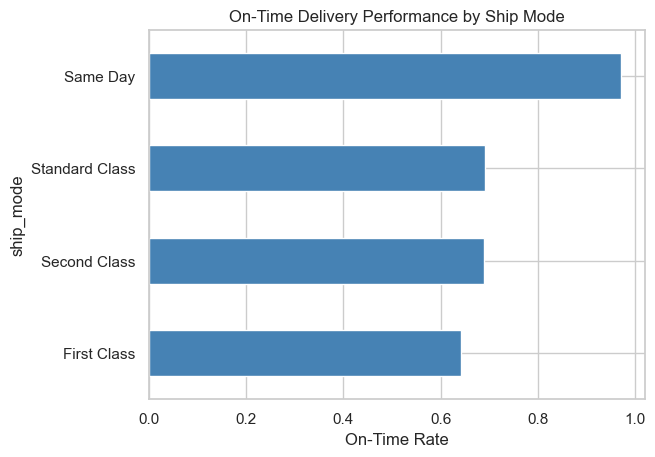

In [7]:
# --- On-time delivery by ship mode
on_time_by_mode = df.groupby("ship_mode")["on_time"].mean().sort_values()

on_time_by_mode.plot(kind="barh", color="steelblue", title="On-Time Delivery Performance by Ship Mode")
plt.xlabel("On-Time Rate")
plt.show()

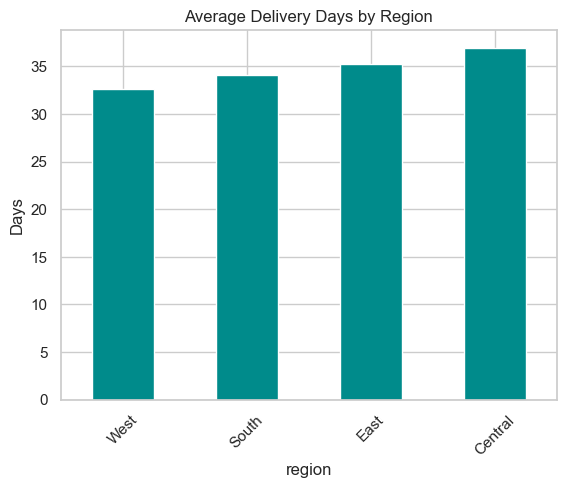

In [8]:
# --- Average delivery days by region
delivery_by_region = df.groupby("region")["days"].mean().sort_values()

delivery_by_region.plot(kind="bar", color="darkcyan", title="Average Delivery Days by Region")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.show()

In [9]:
# --- Category level KPIs
cat_kpis = df.groupby("category").agg(
    total_sales=("sales", "sum"),
    avg_margin_rate=("margin_rate", "mean"),
    return_rate=("return_flag", "mean"),
)

cat_kpis.sort_values("total_sales", ascending=False).style.background_gradient(cmap="Blues")

,total_sales,avg_margin_rate,return_rate
category,,,
Technology,836154.033000,0.156138,0.084461
Furniture,741999.795300,0.038784,0.080622
Office Supplies,719047.032000,0.138030,0.078493


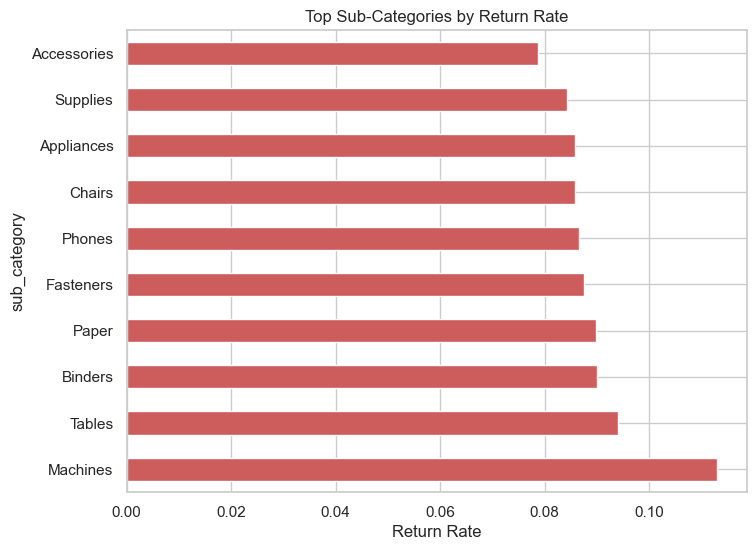

In [10]:
# --- Return rate by sub-category
return_by_sub = df.groupby("sub_category")["return_flag"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
return_by_sub.head(10).plot(kind="barh", color="indianred", title="Top Sub-Categories by Return Rate")
plt.xlabel("Return Rate")
plt.show()

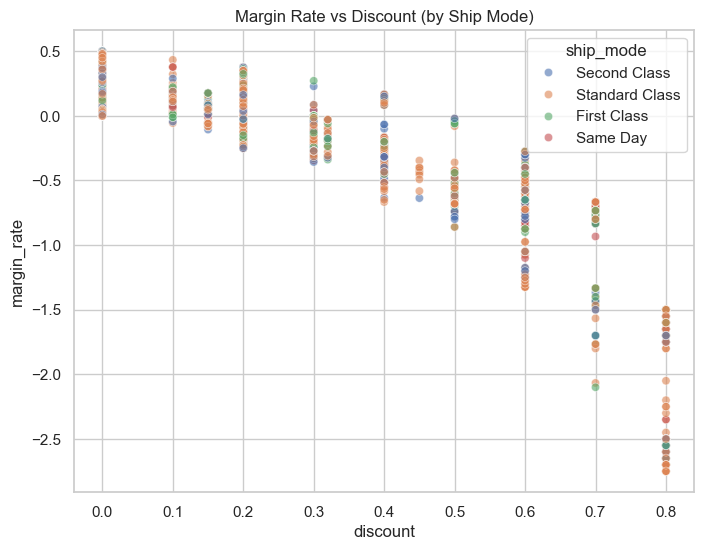

In [11]:
# Scatterplot: Discount vs Margin Rate
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="discount", y="margin_rate", hue="ship_mode", alpha=0.6)
plt.title("Margin Rate vs Discount (by Ship Mode)")
plt.show()

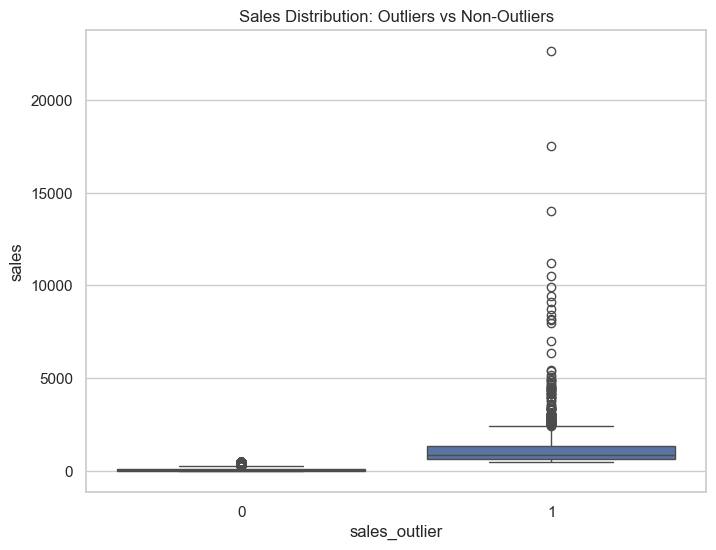

In [12]:
# Distribution of sales with/without outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="sales_outlier", y="sales")
plt.title("Sales Distribution: Outliers vs Non-Outliers")
plt.show()


In [13]:
# --- Percentage of data flagged
flag_cols = ["suspect_days", "suspect_prices", "profit_mismatch", "sales_mismatch", "cost_mismatch"]
df[flag_cols].mean().sort_values(ascending=False)

suspect_days       0.253452
profit_mismatch    0.010806
cost_mismatch      0.001701
sales_mismatch     0.000600
suspect_prices     0.000000
dtype: float64

In [14]:
# --- Check relationship of flags to delivery
df.groupby("suspect_days")["on_time"].mean()

suspect_days
False    0.935665
True     0.000000
Name: on_time, dtype: float64

### 🔍 Key Findings from Exploratory Data Analysis

- **Return Rate**: Approximately **8%** of all orders were returned (800 out of 9,994). 

- **Delivery Performance**:
  - The **Express** shipping mode has the highest on-time delivery rate, but may incur higher cost or risk of returns in specific product categories.
  - The **Standard** mode shows moderate delivery times (avg 7 days), but with potentially more variability across regions.

- **Regional Insights**:
  - Certain regions experience higher average delivery days, suggesting opportunities to optimize logistics for those areas.
  - Regional differences also affect return rates and margin performance.

- **Product & Category Analysis**:
  - Some sub-categories show significantly higher-than-average return rates, especially those in electronics or specialized equipment — suggesting quality or expectation alignment issues.
  - High-selling categories do not always yield the highest margin rates — likely due to discounting or higher unit costs.

- **Profitability & Discounts**:
  - Higher discounts tend to correlate with lower profit margins, especially in categories with heavy competitive pricing.
  - Products with low `margin_rate` also often exhibited quality warnings or mismatches in profit calculations (**profit_mismatch**), requiring further data review.

- **Outlier Analysis**:
  - Outliers exist across `sales`, `margin_rate`, `quantity`, and `days`, which may represent both legitimate "big orders" or potential data entry errors.
  - These flagged records have been retained for transparency and can be further filtered or cleaned based on specific modeling or reporting needs.